# Spaceship Titanic

# The first step involves the process of importing the libraries necessary and loading of the dataset

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Data Acquistion

# Loading the datasets and begin Exploratory Data Analysis

In [2]:
train = pd.read_csv(r"C:\Users\Dwayne D'costa\Documents\Anglia Ruskin University\Tutorials\Advanced Machine Learning\NEW\Spaceship Titanic\spaceship-titanic\train.csv")
test= pd.read_csv(r"C:\Users\Dwayne D'costa\Documents\Anglia Ruskin University\Tutorials\Advanced Machine Learning\NEW\Spaceship Titanic\spaceship-titanic\test.csv")

In [3]:
cols_to_use = ["HomePlanet","CryoSleep","Destination","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Transported"]

In [4]:
train = train[cols_to_use]

# EDA

In [5]:
# Checking out the first 5 rows of the dataset
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [6]:
# Checking the shape & size of the training dataset
train.shape

(8693, 11)

# The info() method gives detailed information about the dataset

In [7]:
# the info() method gives detailed information about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [8]:
# The describe method gives us information about all the numerical data in the dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


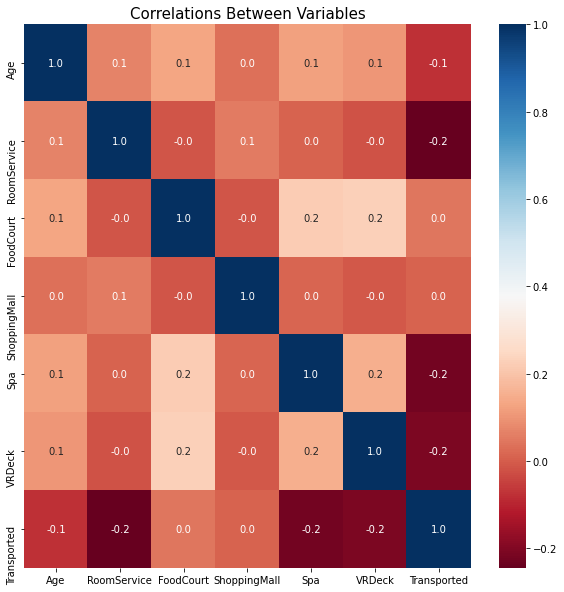

In [9]:
# Now I am going on to visualize the correlation between variables using a correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap="RdBu",annot=True, fmt=".1f")
plt.title("Correlations Between Variables", size=15)
plt.show();

# Checking for Missing Values

In [10]:
print("Missing Values by Column")
print(train.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",train.isna().sum().sum())

Missing Values by Column
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 1925


# Re-checking the status of the missing values and dealing with them

In [11]:
# Continuous Values
train["Age"].fillna(train["Age"].median(), inplace=True)
train["FoodCourt"].fillna(train["FoodCourt"].median(), inplace=True)
train["ShoppingMall"].fillna(train["ShoppingMall"].median(), inplace=True)
train["Spa"].fillna(train["Spa"].median(), inplace=True)
train["VRDeck"].fillna(train["VRDeck"].median(), inplace=True)
train["RoomService"].fillna(train["RoomService"].median(), inplace=True)
# Categorical Values
train["HomePlanet"].fillna(train["HomePlanet"].mode().values[0], inplace=True)
train["CryoSleep"].fillna(train["CryoSleep"].mode().values[0], inplace=True)
train["Destination"].fillna(train["Destination"].mode().values[0], inplace=True)
train["VIP"].fillna(train["VIP"].mode().values[0], inplace=True)

In [12]:
print("Missing Values by Column")
print(train.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",train.isna().sum().sum())

Missing Values by Column
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [13]:
# All the labelled data in the dataset labelled 'X' is encoded using one-hot encoding method.
# The dataset will further be split into training and testing datasets respectively as it would aid in an increase in the improvement of the model evaluation 
y = train["Transported"]
X = train.drop("Transported", axis =1)

oenc=OneHotEncoder(handle_unknown="ignore")
multiple_enc=oenc.fit_transform(X[["HomePlanet","CryoSleep","Destination","VIP"]])
multiple_enc=multiple_enc.toarray()
multiple_enc=pd.DataFrame(multiple_enc,columns=oenc.get_feature_names())
X.drop(["HomePlanet","CryoSleep","Destination","VIP"],axis=1,inplace=True)
X =pd.concat([X,multiple_enc],axis=1) 

In [14]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [15]:
# Now let's standardise the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
label = LabelEncoder()
y_train =  label.fit_transform(y_train)
y_test = label.transform(y_test)

# Model Training

# A number of machine learning models are implemented in this code in order to get a better accuracy

# XGBoost

In [16]:
xgb_model = XGBClassifier(random_state=42).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7856485740570377

# Support Vector Machine 

In [17]:
svm_model = SVC(kernel="linear", random_state=42).fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7727690892364305

# CatBoost

In [18]:
catboost_model = CatBoostClassifier(random_state=42).fit(X_train,y_train)
y_pred = catboost_model.predict(X_test)
accuracy_score(y_test,y_pred)

Learning rate set to 0.02294
0:	learn: 0.6815049	total: 147ms	remaining: 2m 27s
1:	learn: 0.6701033	total: 150ms	remaining: 1m 14s
2:	learn: 0.6596770	total: 152ms	remaining: 50.4s
3:	learn: 0.6485309	total: 154ms	remaining: 38.2s
4:	learn: 0.6382637	total: 155ms	remaining: 30.9s
5:	learn: 0.6292800	total: 157ms	remaining: 26s
6:	learn: 0.6201574	total: 159ms	remaining: 22.6s
7:	learn: 0.6134206	total: 161ms	remaining: 20s
8:	learn: 0.6072532	total: 163ms	remaining: 17.9s
9:	learn: 0.6009754	total: 165ms	remaining: 16.3s
10:	learn: 0.5933094	total: 167ms	remaining: 15s
11:	learn: 0.5862692	total: 169ms	remaining: 13.9s
12:	learn: 0.5807917	total: 170ms	remaining: 12.9s
13:	learn: 0.5765760	total: 172ms	remaining: 12.1s
14:	learn: 0.5704343	total: 174ms	remaining: 11.4s
15:	learn: 0.5663803	total: 176ms	remaining: 10.8s
16:	learn: 0.5612151	total: 178ms	remaining: 10.3s
17:	learn: 0.5563196	total: 180ms	remaining: 9.81s
18:	learn: 0.5522690	total: 182ms	remaining: 9.38s
19:	learn: 0.549

205:	learn: 0.4151639	total: 544ms	remaining: 2.1s
206:	learn: 0.4150410	total: 546ms	remaining: 2.09s
207:	learn: 0.4149134	total: 548ms	remaining: 2.09s
208:	learn: 0.4147291	total: 550ms	remaining: 2.08s
209:	learn: 0.4146167	total: 552ms	remaining: 2.08s
210:	learn: 0.4143807	total: 554ms	remaining: 2.07s
211:	learn: 0.4142178	total: 556ms	remaining: 2.06s
212:	learn: 0.4141046	total: 558ms	remaining: 2.06s
213:	learn: 0.4140085	total: 560ms	remaining: 2.06s
214:	learn: 0.4139117	total: 562ms	remaining: 2.05s
215:	learn: 0.4137846	total: 564ms	remaining: 2.05s
216:	learn: 0.4136607	total: 566ms	remaining: 2.04s
217:	learn: 0.4135620	total: 568ms	remaining: 2.04s
218:	learn: 0.4134092	total: 570ms	remaining: 2.03s
219:	learn: 0.4132519	total: 572ms	remaining: 2.03s
220:	learn: 0.4131735	total: 574ms	remaining: 2.02s
221:	learn: 0.4130803	total: 576ms	remaining: 2.02s
222:	learn: 0.4129851	total: 578ms	remaining: 2.01s
223:	learn: 0.4128898	total: 580ms	remaining: 2.01s
224:	learn: 0

396:	learn: 0.3958526	total: 904ms	remaining: 1.37s
397:	learn: 0.3957620	total: 906ms	remaining: 1.37s
398:	learn: 0.3956915	total: 908ms	remaining: 1.37s
399:	learn: 0.3956099	total: 910ms	remaining: 1.36s
400:	learn: 0.3955275	total: 912ms	remaining: 1.36s
401:	learn: 0.3954248	total: 914ms	remaining: 1.36s
402:	learn: 0.3953636	total: 915ms	remaining: 1.36s
403:	learn: 0.3952406	total: 917ms	remaining: 1.35s
404:	learn: 0.3951878	total: 919ms	remaining: 1.35s
405:	learn: 0.3951108	total: 921ms	remaining: 1.35s
406:	learn: 0.3949728	total: 923ms	remaining: 1.34s
407:	learn: 0.3948984	total: 925ms	remaining: 1.34s
408:	learn: 0.3947750	total: 926ms	remaining: 1.34s
409:	learn: 0.3947070	total: 928ms	remaining: 1.33s
410:	learn: 0.3945677	total: 930ms	remaining: 1.33s
411:	learn: 0.3944712	total: 932ms	remaining: 1.33s
412:	learn: 0.3943970	total: 934ms	remaining: 1.33s
413:	learn: 0.3942873	total: 936ms	remaining: 1.32s
414:	learn: 0.3941478	total: 938ms	remaining: 1.32s
415:	learn: 

587:	learn: 0.3778567	total: 1.26s	remaining: 885ms
588:	learn: 0.3777894	total: 1.26s	remaining: 883ms
589:	learn: 0.3777245	total: 1.27s	remaining: 881ms
590:	learn: 0.3776480	total: 1.27s	remaining: 878ms
591:	learn: 0.3775670	total: 1.27s	remaining: 876ms
592:	learn: 0.3773715	total: 1.27s	remaining: 874ms
593:	learn: 0.3772891	total: 1.27s	remaining: 871ms
594:	learn: 0.3772160	total: 1.28s	remaining: 869ms
595:	learn: 0.3771325	total: 1.28s	remaining: 867ms
596:	learn: 0.3770148	total: 1.28s	remaining: 865ms
597:	learn: 0.3769465	total: 1.28s	remaining: 862ms
598:	learn: 0.3768674	total: 1.28s	remaining: 860ms
599:	learn: 0.3767702	total: 1.29s	remaining: 858ms
600:	learn: 0.3767044	total: 1.29s	remaining: 856ms
601:	learn: 0.3766453	total: 1.29s	remaining: 853ms
602:	learn: 0.3765975	total: 1.29s	remaining: 851ms
603:	learn: 0.3765421	total: 1.29s	remaining: 849ms
604:	learn: 0.3764247	total: 1.3s	remaining: 847ms
605:	learn: 0.3763884	total: 1.3s	remaining: 845ms
606:	learn: 0.

780:	learn: 0.3612974	total: 1.63s	remaining: 456ms
781:	learn: 0.3612644	total: 1.63s	remaining: 454ms
782:	learn: 0.3611996	total: 1.63s	remaining: 452ms
783:	learn: 0.3611413	total: 1.63s	remaining: 449ms
784:	learn: 0.3610182	total: 1.63s	remaining: 447ms
785:	learn: 0.3609351	total: 1.64s	remaining: 445ms
786:	learn: 0.3608902	total: 1.64s	remaining: 443ms
787:	learn: 0.3607918	total: 1.64s	remaining: 441ms
788:	learn: 0.3607153	total: 1.64s	remaining: 439ms
789:	learn: 0.3606450	total: 1.64s	remaining: 437ms
790:	learn: 0.3605497	total: 1.64s	remaining: 434ms
791:	learn: 0.3604424	total: 1.65s	remaining: 432ms
792:	learn: 0.3603846	total: 1.65s	remaining: 430ms
793:	learn: 0.3603361	total: 1.65s	remaining: 428ms
794:	learn: 0.3602642	total: 1.65s	remaining: 426ms
795:	learn: 0.3601546	total: 1.65s	remaining: 424ms
796:	learn: 0.3600560	total: 1.66s	remaining: 422ms
797:	learn: 0.3599473	total: 1.66s	remaining: 419ms
798:	learn: 0.3598972	total: 1.66s	remaining: 417ms
799:	learn: 

973:	learn: 0.3464384	total: 1.98s	remaining: 52.9ms
974:	learn: 0.3463756	total: 1.99s	remaining: 50.9ms
975:	learn: 0.3462790	total: 1.99s	remaining: 48.9ms
976:	learn: 0.3461763	total: 1.99s	remaining: 46.8ms
977:	learn: 0.3460798	total: 1.99s	remaining: 44.8ms
978:	learn: 0.3460417	total: 1.99s	remaining: 42.8ms
979:	learn: 0.3459679	total: 1.99s	remaining: 40.7ms
980:	learn: 0.3458939	total: 2s	remaining: 38.7ms
981:	learn: 0.3457796	total: 2s	remaining: 36.6ms
982:	learn: 0.3457436	total: 2s	remaining: 34.6ms
983:	learn: 0.3456988	total: 2s	remaining: 32.6ms
984:	learn: 0.3456589	total: 2s	remaining: 30.5ms
985:	learn: 0.3455876	total: 2.01s	remaining: 28.5ms
986:	learn: 0.3455761	total: 2.01s	remaining: 26.5ms
987:	learn: 0.3454945	total: 2.01s	remaining: 24.4ms
988:	learn: 0.3454079	total: 2.01s	remaining: 22.4ms
989:	learn: 0.3453070	total: 2.01s	remaining: 20.3ms
990:	learn: 0.3452118	total: 2.02s	remaining: 18.3ms
991:	learn: 0.3451409	total: 2.02s	remaining: 16.3ms
992:	lea

0.7874885004599816

# Logistic Regression

In [19]:
log_model = LogisticRegression(solver="liblinear",random_state=42).fit(X_train,y_train)
y_pred = log_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7769089236430543

# Random Forest Classifier

In [20]:
rf_model = RandomForestClassifier(random_state=42).fit(X_train,y_train)
rf_model
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7755289788408464

# KNN Classifier

In [21]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7704691812327507

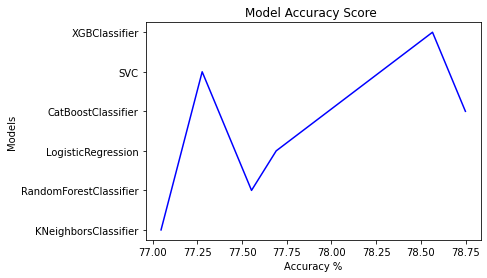

In [22]:
# Model Selection
models = [
    xgb_model,
    svm_model,
    catboost_model,
    log_model,
    rf_model,
    knn_model,
]

results = []
results = pd.DataFrame(columns=["Models","Accuracy"])

# Visualize The Model Accuracy Score 
for model in models:
    Name = model.__class__.__name__
    y_pred = model.predict(X_test)
    Accuracy = accuracy_score(y_test,y_pred)
    result = pd.DataFrame([[Name, Accuracy*100]], columns = ["Models","Accuracy"])
    results = results.append(result)
#
sns.lineplot(x='Accuracy', y='Models', data=results, color = "b")
plt.xlabel('Accuracy %')
plt.title('Model Accuracy Score ');

In [23]:
results

,Models,Accuracy
0,XGBClassifier,78.564857
0,SVC,77.276909
0,CatBoostClassifier,78.748850
0,LogisticRegression,77.690892
0,RandomForestClassifier,77.552898
0,KNeighborsClassifier,77.046918


# Model Tuning

# Logistic Regression

In [51]:
log_model = LogisticRegression(solver="liblinear").fit(X_train,y_train)
y_pred = log_model.predict(X_test)
cross_val_score(log_model,X_test,y_test,cv=10).mean()
accuracy_score(y_test,y_pred)

0.7769089236430543

# XGBoost

In [25]:
xgb_model = XGBClassifier()
xgb_params =  {"learning_rate": [0.1,0.001,0.01],
             "n_estimators": [100,500,1000],
             "subsample":[0.6,0.8,1],
              "max_depth":[3,5,7]}
xgb_cv_model = GridSearchCV(xgb_model,xgb_params,cv=10,n_jobs=-1,verbose=0).fit(X_train,y_train)
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

In [26]:
xgb_tuned = XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators=100, subsample=0.8).fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7833486660533578

# Random Forest

In [27]:
rf = RandomForestClassifier()
rf_params = {'n_estimators': [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}
rf_cv_model = GridSearchCV(rf,rf_params, cv=5, n_jobs=-1, verbose=0).fit(X_train,y_train)
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 20, 'n_estimators': 1000}

In [28]:
rf_tuned = RandomForestClassifier(max_features=3,min_samples_split=20, n_estimators=1000).fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)


0.7943882244710212

# Compare the results of models chosen

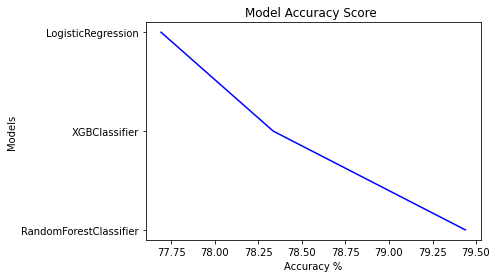

In [52]:
# Model Selection
models = [
    log_model,
    xgb_tuned,
    rf_tuned
]

results = []
results = pd.DataFrame(columns=["Models","Accuracy"])

# Visualize The Model Accuracy Score 
for model in models:
    Name = model.__class__.__name__
    y_pred = model.predict(X_test)
    Accuracy = accuracy_score(y_test,y_pred)
    result = pd.DataFrame([[Name, Accuracy*100]], columns = ["Models","Accuracy"])
    results = results.append(result)
#
sns.lineplot(x='Accuracy', y='Models', data=results, color = "b")
plt.xlabel('Accuracy %')
plt.title('Model Accuracy Score ');

In [53]:
results

,Models,Accuracy
0,LogisticRegression,77.690892
0,XGBClassifier,78.334867
0,RandomForestClassifier,79.438822


In [31]:
# Checking for missing values
print("Missing Values by Column")
print(test.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",test.isna().sum().sum())

Missing Values by Column
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
------------------------------
TOTAL MISSING VALUES: 1117


In [32]:
# Dealing with the issue of the missing values
# Continuous Values
test["Age"].fillna(test["Age"].median(), inplace=True)
test["FoodCourt"].fillna(test["FoodCourt"].median(), inplace=True)
test["ShoppingMall"].fillna(test["ShoppingMall"].median(), inplace=True)
test["Spa"].fillna(test["Spa"].median(), inplace=True)
test["VRDeck"].fillna(test["VRDeck"].median(), inplace=True)
test["RoomService"].fillna(test["RoomService"].median(), inplace=True)
# Categorical Values
test["HomePlanet"].fillna(test["HomePlanet"].mode().values[0], inplace=True)
test["CryoSleep"].fillna(test["CryoSleep"].mode().values[0], inplace=True)
test["Destination"].fillna(test["Destination"].mode().values[0], inplace=True)
test["VIP"].fillna(test["VIP"].mode().values[0], inplace=True)

In [33]:
print("Missing Values by Column")
print(test.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",test.isna().sum().sum())

Missing Values by Column
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64
------------------------------
TOTAL MISSING VALUES: 194


In [34]:
test.drop(["PassengerId","Cabin","Name"],axis=1,inplace=True)

In [35]:
# Now I will be using one hot encoding to encode the categorical features mentioned above into the dataset
multiple_enc=oenc.transform(test[["HomePlanet","CryoSleep","Destination","VIP"]])
multiple_enc=multiple_enc.toarray()

multiple_enc=pd.DataFrame(multiple_enc,columns=oenc.get_feature_names())
test.drop(["HomePlanet","CryoSleep","Destination","VIP"],axis=1,inplace=True)
test =pd.concat([test,multiple_enc],axis=1) # append to original dataframe

In [36]:
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,x2_TRAPPIST-1e,x3_False,x3_True
0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,20.0,10.0,0.0,635.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [37]:
test = scaler.transform(test)

In [38]:
# Now lwt's proceed with the test prediction
sample_submission = pd.read_csv(r"C:\Users\Dwayne D'costa\Documents\Anglia Ruskin University\Tutorials\Advanced Machine Learning\NEW\Spaceship Titanic\spaceship-titanic\sample_submission.csv")
test_preds = rf_tuned.predict(test)
sample_submission["Transported"] = test_preds

In [39]:
sample_submission["Transported"] = label.inverse_transform(sample_submission["Transported"])

In [40]:
sample_submission["Transported"]

0        True
1       False
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11      False
12       True
13       True
14      False
15      False
16      False
17       True
18       True
19      False
20       True
21      False
22       True
23       True
24      False
25      False
26       True
27       True
28       True
29       True
30       True
31      False
32       True
33       True
34      False
35      False
36       True
37       True
38      False
39      False
40       True
41      False
42       True
43      False
44      False
45       True
46      False
47      False
48       True
49      False
50       True
51       True
52      False
53       True
54       True
55       True
56      False
57       True
58       True
59      False
60       True
61       True
62      False
63       True
64       True
65      False
66       True
67      False
68      False
69      False
70      False
71    

In [41]:
sample_submission.to_csv("submission.csv", index = False)